# Polynomial Linear Regression

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as `nth` degree polynomial.  
The formula is:
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_n x^n + \epsilon
$$

It is a linear model with some modification in order to increase the accuracy

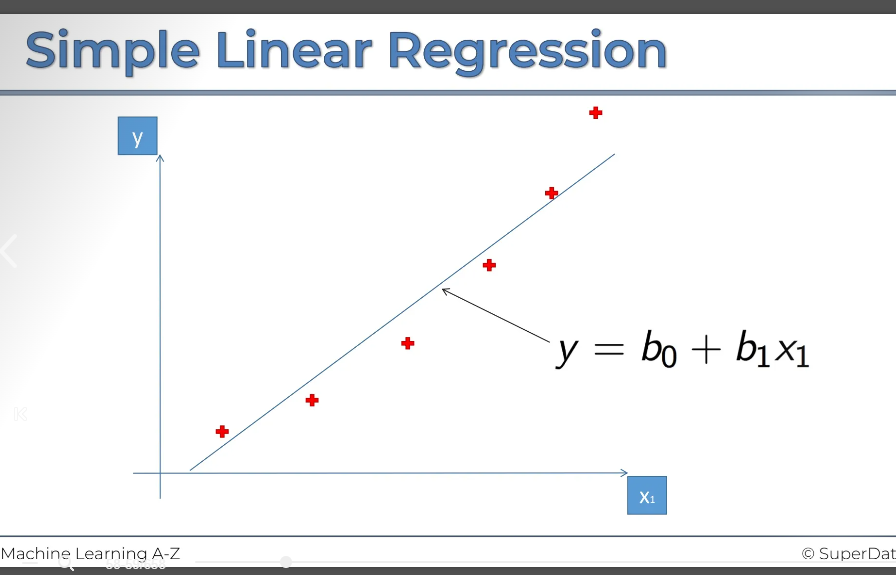

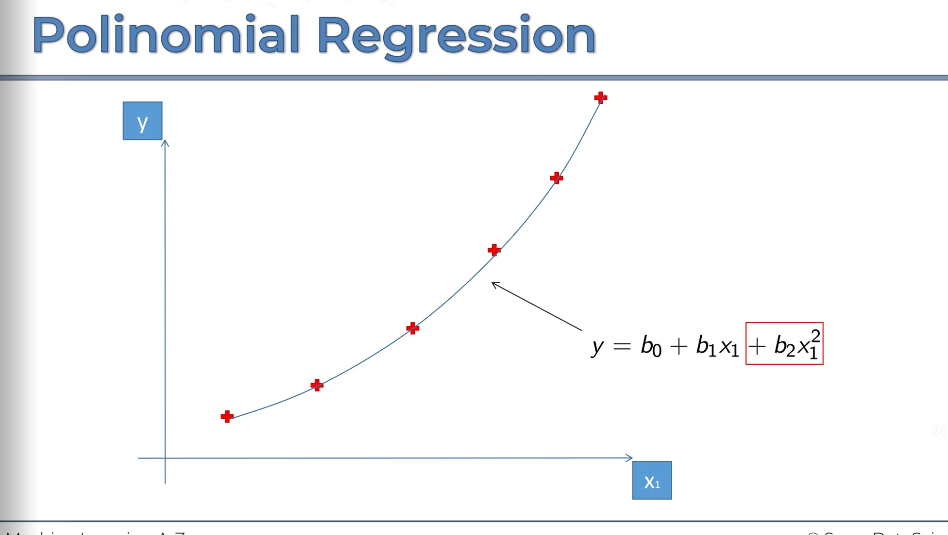

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


We don't need `Position` column. we only required `level` column as feature.

In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset.
Since, there is only `one` `feature`.

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset.


We will first define the `polynomial values` of `X` i.e. `x^2`, `x^3` upto `x^n` using `PolynomialFeatures` class.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
plr = PolynomialFeatures(degree = 4)
X_poly = plr.fit_transform(X) # creating the new features.
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

- `PolynomialFeatures(degree=4)` creates a transformer object `plr` that will transform the input data `X` by adding polynomial features up to degree `4`.
- `fit_transform(X)` transforms your original feature matrix `X` by adding polynomial features and stores it in `X_poly`.  
- The transformation adds all polynomial combinations of the input features with degrees less than or equal to `4`.

For example, if X has one feature (say, `x`), `X_poly` will contain:
- 1 (the intercept term).
- $x$
- $x^2$
- $x^3$
- $x^4$


In [13]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


`X` contains only `1` feature.

In [12]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


Now, `X_poly` contains `5` feautres

## Visualising the Linear Regression results

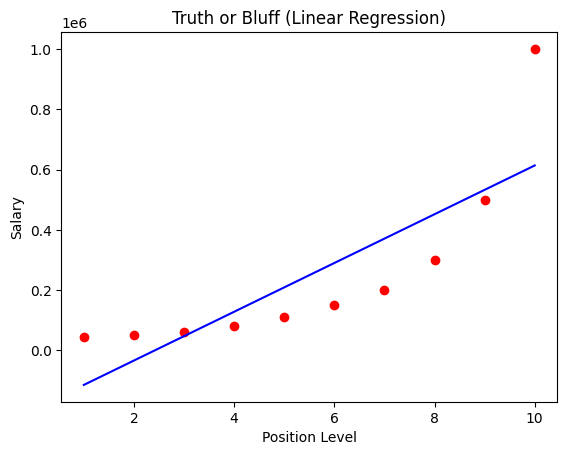

In [15]:
plt.scatter(X, y, color='red')
plt.plot(X, lr.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

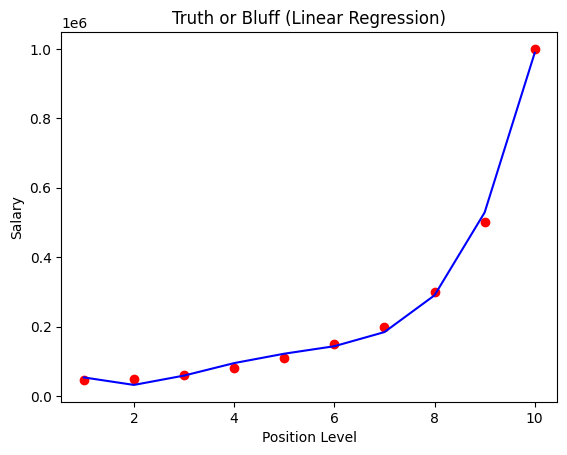

In [8]:
plt.scatter(X, y, color='red')
plt.plot(X, lr2.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

The model is `overfitted`

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

<ipython-input-9-b33dd07af78d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


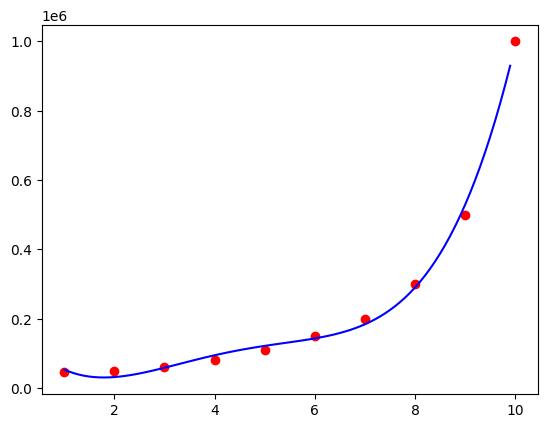

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lr2.predict(plr.fit_transform(X_grid)), color='blue')

## Predicting the new result with Linear Regression

In [10]:
lr.predict([[6.5]])

array([330378.78787879])

## Predicting the new result with Polynomial Regression

In [11]:
lr2.predict(plr.fit_transform([[6.5]]))

array([158862.45265155])